In [12]:
#Importing Libraries 
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn 
import nltk 
import re 
import spacy
%matplotlib inline 
#rest libraries other than these major will be imported at the time of requirement 

In [13]:
#reading the dataset
df=pd.read_csv("train_set_taskA - train_set_Fire2022.csv")
#displaying first 10 rows 
display(df.head(10))

,anger,disgust,fear,sadness,surprise,happiness,neutral,Sentences
0,0,0,0,1,1,0,0,محبت کے پردے میں نفرت کرنےوالو
1,0,0,0,0,0,1,0,حامد میر کی خوشی کے لئے اس کا ذمہ دار حکومت ہو...
2,0,0,0,0,0,0,1,اس نئے سال کی شام، ایک سپاہی قاتل (لارنس Fishb...
3,0,0,0,0,0,0,1,کچھ اس طرح سے ایک فلم کے لئے جا سکتے ہیں لیکن ...
4,0,0,0,0,0,0,1,"رون ہاورڈ اور اس کے ""ایڈیٹرز"" صرف اتنا کرنا ....."
5,0,0,0,0,0,0,0,نتائج دنیا کو حیرت میں ڈال سکتی ھے نتائج دس اق...
6,0,0,0,0,1,0,0,ہم غصے خراب موڈ خوشی اور غمی سب میں چپلی کباب ...
7,0,0,0,1,1,0,0,اب ایسی حیرت و وارفتگی کو کیا کہیے دعا کو ہاتھ...
8,0,0,0,1,1,0,0,دے تو رہے ہیں آپ اپنی آنکھوں سے نفرت کی پٹی ات...
9,0,0,0,0,1,0,0,حیرت ہوئی


In [14]:
#knowing about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   anger      7800 non-null   int64 
 1   disgust    7800 non-null   int64 
 2   fear       7800 non-null   int64 
 3   sadness    7800 non-null   int64 
 4   surprise   7800 non-null   int64 
 5   happiness  7800 non-null   int64 
 6   neutral    7800 non-null   int64 
 7   Sentences  7800 non-null   object
dtypes: int64(7), object(1)
memory usage: 487.6+ KB


In [15]:
df.isnull().any()#checking null values

anger        False
disgust      False
fear         False
sadness      False
surprise     False
happiness    False
neutral      False
Sentences    False
dtype: bool

In [16]:
df.isna().any()#checking na values

anger        False
disgust      False
fear         False
sadness      False
surprise     False
happiness    False
neutral      False
Sentences    False
dtype: bool

In [18]:
#Generate Statistical Count Features
df['word_count'] = df['Sentences'].apply(lambda x : len(x.split()))
df['char_count'] = df['Sentences'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)
df[['word_count', 'char_count', 'word_density']].head(10)

,word_count,char_count,word_density
0,6,25,0.230769
1,14,40,0.341463
2,248,936,0.264674
3,185,667,0.276946
4,133,461,0.287879
5,21,75,0.276316
6,12,40,0.292683
7,16,55,0.285714
8,22,76,0.285714
9,2,8,0.222222


In [48]:
font_1= {'family': 'monospace',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }
font_2=font= {'family': 'sans',
        'color':  'darkred',
        'weight': 'normal',
        'size': 18,
        }

Text(200, 2000, 'It is evident from the graph that most of the word count are in\nrange 200-300 thus, the sentences havean average word count of 123')

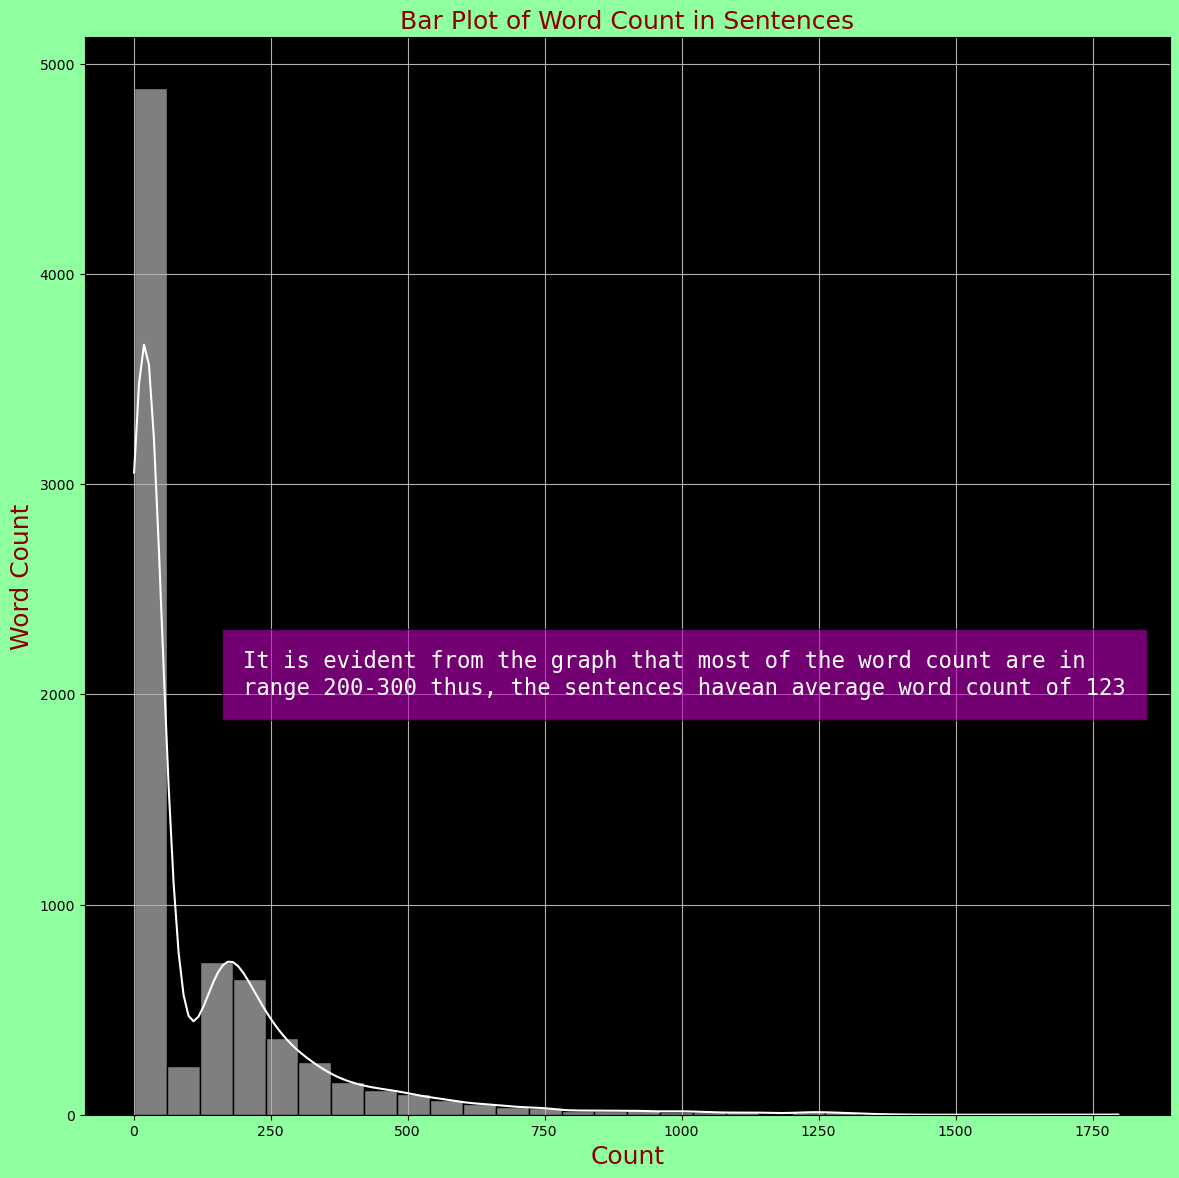

In [68]:
#visualizing statistical Count Features 
avg_wc=int(np.sum(df["word_count"])/len(df["word_count"]))
fig,ax=plt.subplots(figsize=(14,14))
sn.histplot(data=df,x="word_count",kde=True,ax=ax,color="white",binwidth=60)
fig.patch.set_facecolor('xkcd:mint green')
ax.set_facecolor('black')
plt.grid(True)
plt.title("Bar Plot of Word Count in Sentences",fontdict=font_2)
plt.xlabel("Count",fontdict=font_2)
plt.ylabel("Word Count",fontdict=font_2)
ax.text(200,2000,f"It is evident from the graph that most of the word count are in\nrange 200-300 thus, the sentences have\
an average word count of {avg_wc}",fontdict=font_1,bbox={'facecolor': 'm','alpha':0.6, 'pad':15})

Text(400, 2000, 'It is evident from the graph that most of the character count are in\nrange 400-500 thus, the sentences havean average character count of 429')

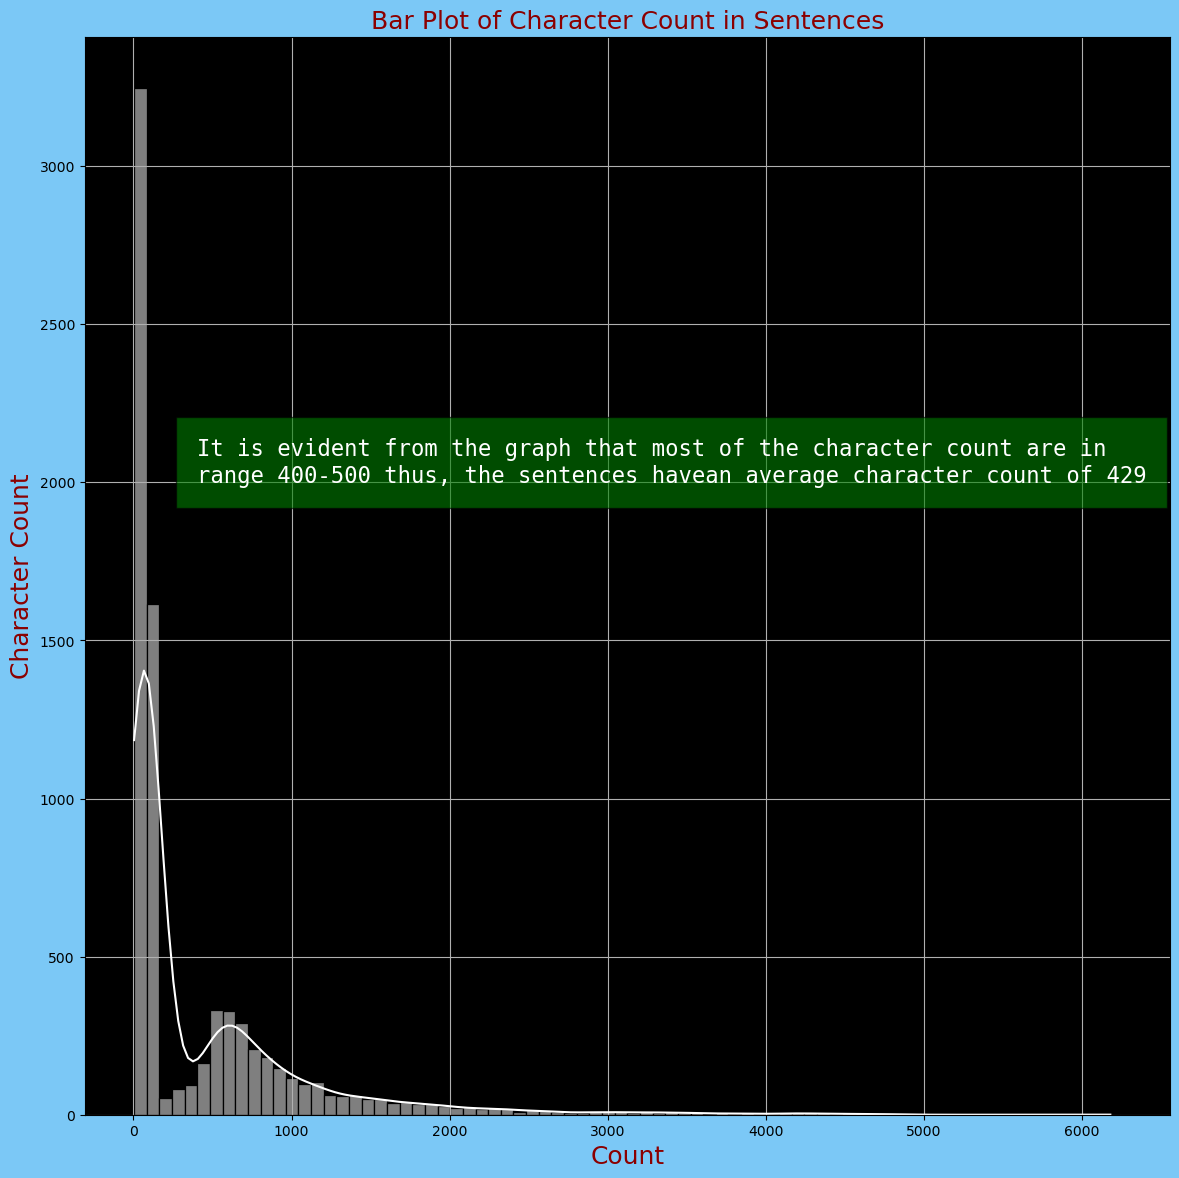

In [69]:
#visualizing statistical Count Features 
avg_cc=int(np.sum(df["char_count"])/len(df["char_count"]))
fig,ax=plt.subplots(figsize=(14,14))
sn.histplot(data=df,x="char_count",kde=True,ax=ax,color="white",binwidth=80)
fig.patch.set_facecolor('xkcd:lightblue')
ax.set_facecolor('xkcd:black')
plt.grid(True)
plt.title("Bar Plot of Character Count in Sentences",fontdict=font_2)
plt.xlabel("Count",fontdict=font_2)
plt.ylabel("Character Count",fontdict=font_2)
ax.text(400,2000,f"It is evident from the graph that most of the character count are in\nrange 400-500 thus, the sentences have\
an average character count of {avg_cc}",fontdict=font_1,bbox={'facecolor': 'g','alpha':0.6, 'pad':15})

In [76]:
#analysing the proportion of sample of dataset
anger = df[df['anger'] == 1].shape[0]
disgust = df[df['disgust'] == 1].shape[0]
fear = df[df['fear'] == 1].shape[0]
surprise=df[df["surprise"]==1].shape[0]
sadness = df[df['sadness'] == 1].shape[0]
happiness = df[df['happiness'] == 1].shape[0]
neutral=df[df["neutral"]==1].shape[0]
print(f"The number of samples of anger are {anger}\n\n")
print(f"The number of samples of disgust are {disgust}\n\n")
print(f"The number of samples of fear are {fear}\n\n")
print(f"The number of samples of sadness are {sadness}\n\n")
print(f"The number of samples of surprise are {surprise}\n\n")
print(f"The number of samples of happiness are {happiness}\n\n")
print(f"The number of samples of neutral are {neutral}\n\n")


The number of samples of anger are 811


The number of samples of disgust are 761


The number of samples of fear are 609


The number of samples of sadness are 2190


The number of samples of surprise are 1550


The number of samples of happiness are 1046


The number of samples of neutral are 3014




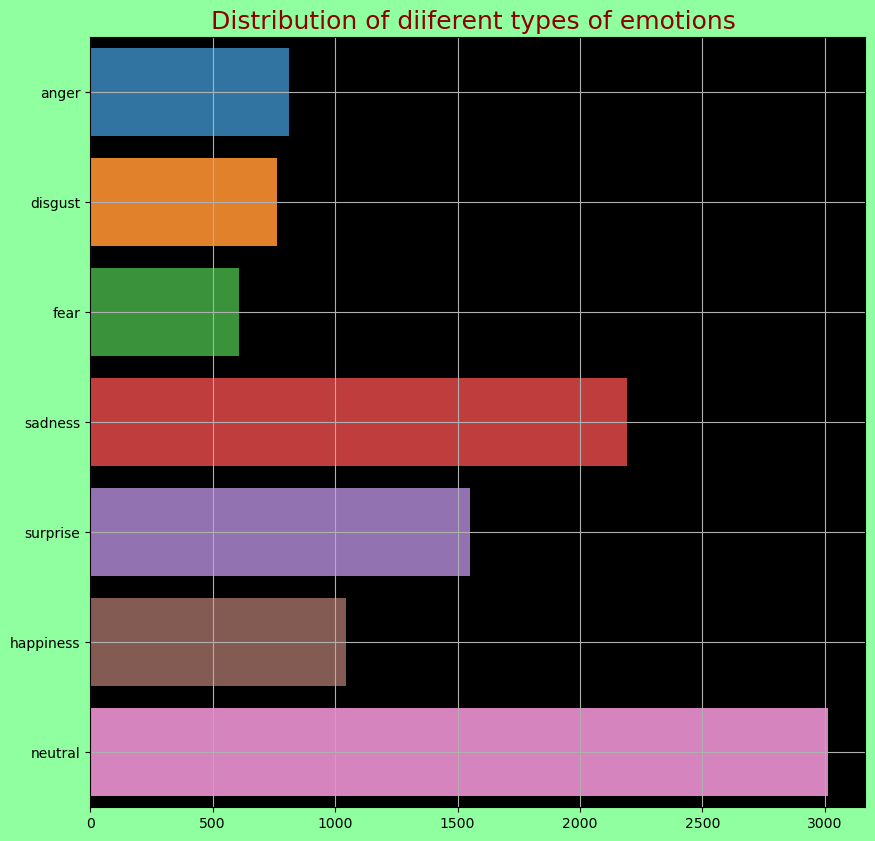

In [105]:
#visualizing the distribution plot 
data=[anger,disgust,fear,sadness,surprise,happiness,neutral]
label=["anger","disgust",'fear',"sadness","surprise","happiness","neutral"]
fig,ax=plt.subplots(figsize=(10,10))
sn.barplot(y=label,x=data,ax=ax)
plt.title("Distribution of diiferent types of emotions ",fontdict=font_2)
ax.set_facecolor('xkcd:black')
fig.patch.set_facecolor('xkcd:mint green')
plt.grid(True)
plt.show()

##### It is evident from the above visualization that the distribution for different class labels is uneven which will further affect the performance of the model . Hence we need to devise a way to fight the class imbalance issue.

## N-Gram Exploration 

In [107]:
# Using countvectorizer to tokenize, vectorize and represent corpus in appropriate form
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

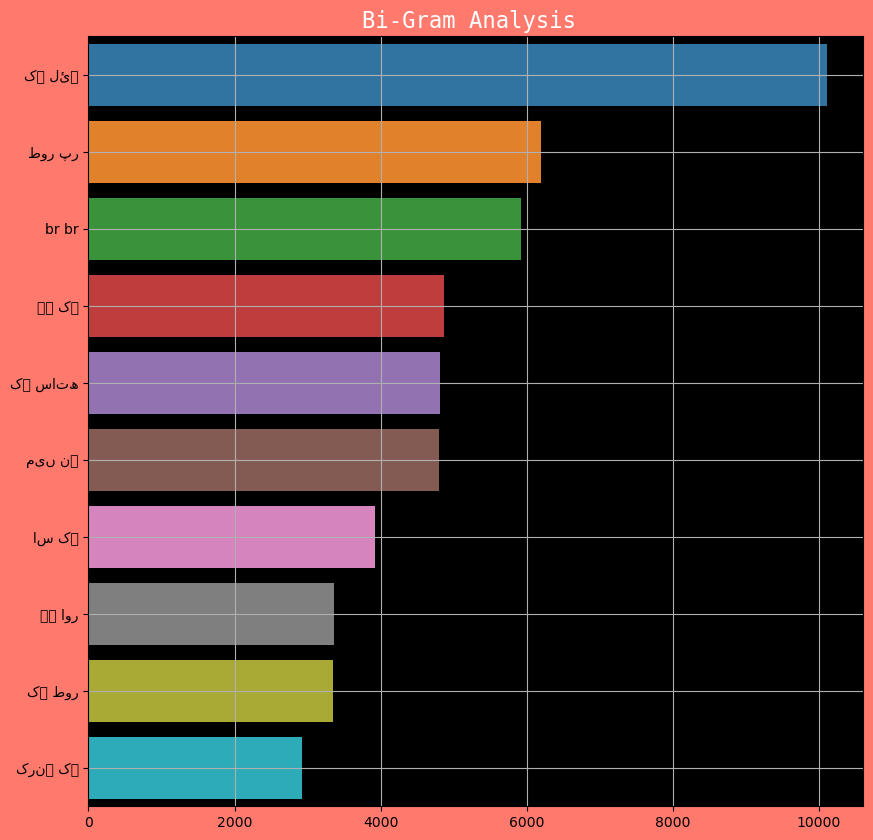

In [112]:
# first using the bigram 
top_bi_grams=get_top_ngram(df["Sentences"],n=2)
x,y=map(list,zip(*top_bi_grams))
fig,ax=plt.subplots(figsize=(10,10))
sn.barplot(x=y,y=x)
plt.title("Bi-Gram Analysis ",fontdict=font_1)
ax.set_facecolor('xkcd:black')
fig.patch.set_facecolor('xkcd:salmon')
plt.grid(True)
plt.show()

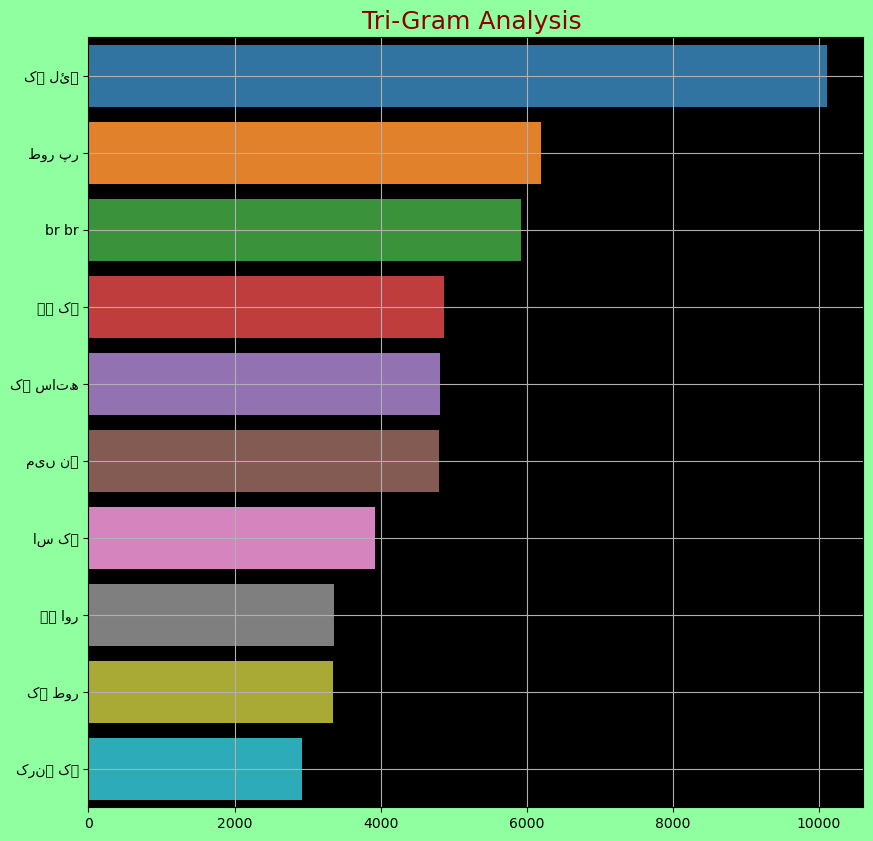

In [114]:
# first using the trigram 
top_ti_grams=get_top_ngram(df["Sentences"],n=3)
x,y=map(list,zip(*top_bi_grams))
fig,ax=plt.subplots(figsize=(10,10))
sn.barplot(x=y,y=x)
plt.title("Tri-Gram Analysis ",fontdict=font_2)
ax.set_facecolor('xkcd:black')
fig.patch.set_facecolor('xkcd:mint green')
plt.grid(True)
plt.show()

##### The above code snippet and visualizations represents the n-gram analysis. Here we have done the Bi-Gram and Tri-Gram Analysis that shows the urdu character most prominent in a sentence. Using the stopwords can also help us remove punctuation and getter better resutls.

## Word Cloud

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = set(stopwords.words("urdu"))

In [124]:
print(stopwords)



{'کہیں', 'ثڑا', 'رہی', 'خوکہ', 'زبصل', 'آج', 'ضکٌب', 'ہوبرے', 'ضوچٌب', 'چھوٹب', 'قجیلہ', 'اچھب', 'ضبدٍ', 'پوچھب', 'لی', 'چبر', 'خت', 'ترتیت', 'ہیں', 'زبضر', 'ضیذھی', 'صفر', 'رریعہ', 'هکول', 'زصے', 'صورتیں', 'ثہتریي', 'هگر', 'صورت', 'ثڑوں', 'کرے', 'ک', 'ٹھیک', 'گئی', 'کورا', 'ہوتے', 'دیکھی', 'اگرچہ', 'فی', 'کب', 'ًئی', 'گروپ', 'پوچھیں', 'چیسیں', 'ثہتر', 'دی', 'ہر', 'ثي', 'دیکھٌب', 'پہلےضی', 'اکیلے', 'رکھ', 'اوًچب', 'ادھر', 'ضبرا', 'هختلف', 'تر', 'ضرورت', 'اچھے', 'ایک', 'ظبہر', 'اختتبم', 'دوضروں', 'تھوڑے', 'خبًٌب', 'کئی', 'ہوچکب', 'پراًب', 'کھولٌب', 'طورپر', 'ثٌذ', 'چھہ', 'کت', 'خب', 'اکٹھب', 'ب', 'ہورہے', 'صورتوں', 'اپٌے', 'کیطرف', 'اطراف', 'خیطب', 'ضیکٌڈ', 'لازهی', 'هڑے', 'راضتوں', 'دیب', 'پوچھوں', 'ًوخواى', 'ضبت', 'زقیتیں', 'ضبتھ', 'والے', 'ثلٌذ', 'کے', 'دوراى', 'خبًتی', 'کہوں', 'ضبلوں', 'وار', 'ضوچب', 'ہوبرا', 'آئے', 'کہتب', 'ثراں', 'ضوچی', 'اً', 'خگہیں', 'پطٌذ', 'گے', 'کیوًکہ', 'ج', 'رکھتب', 'ضروری', 'هسترم', 'ًئے', 'دکھبئیں', 'پوچھتی', 'دکھبتب', 'کوئی', 'چبہٌب', 'گٌتی', 'کیوں', 'ًی

In [129]:
from nltk import PorterStemmer, WordNetLemmatizer, word_tokenize
def preprocess_sentences(df):#preprocessing to create corpus
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for sentence in df['Sentences']:
        words=[w for w in word_tokenize(sentence) if (w not in stopwords)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

In [130]:
corpus=preprocess_sentences(df)

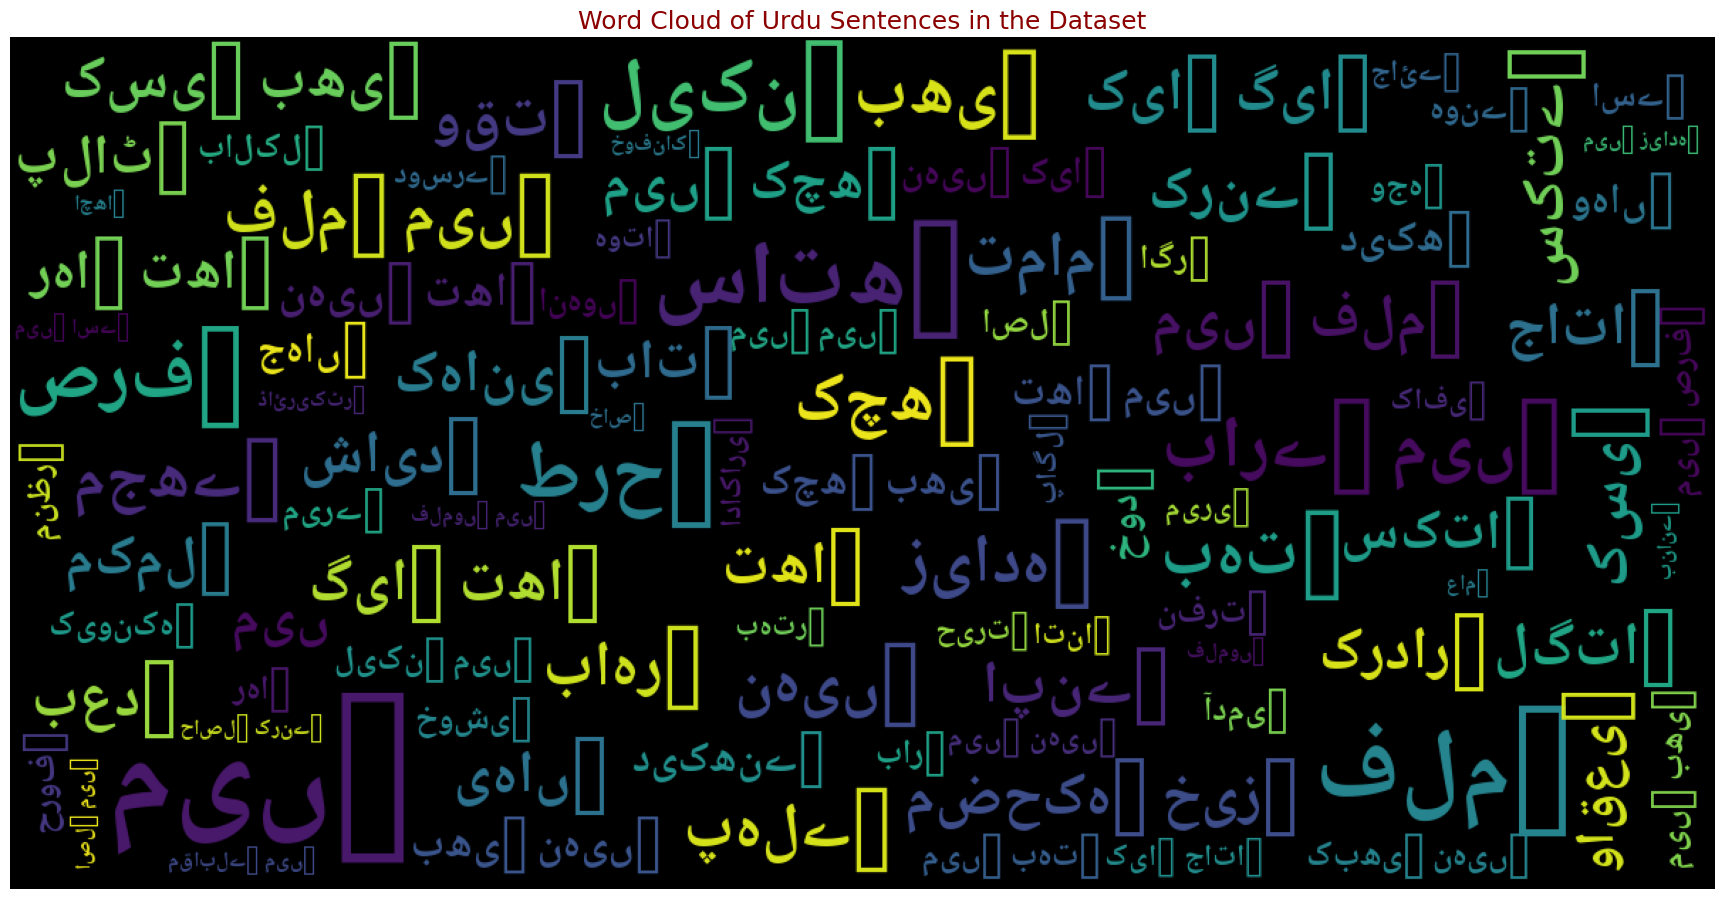

In [141]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        font_path="/media/shirish/337c59f4-fc5e-4bd8-a7df-1ca3c23827fa/shirish/Desktop/IIIT_RANCHI/Urdu-threat-detection-FIRE2022/NotoNaskhArabic-Bold.ttf",
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(22,22))
    plt.axis('off')
    plt.title("Word Cloud of Urdu Sentences in the Dataset",fontdict=font_2)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(corpus)

## Feature Selection

In [148]:
"""
While using the tfdfvecotrizer we keep in mind to put norm equal to l2 so that all the feature vectors 
have a eucledian norm of l1. sublinear_tf is set to true to use logarithmic frequency
ngram is set to (1,2) so that we consider both unigram and bi-gram 
we also use stopwords in urdu to reduce the noise of the data and make feautres more useful
"""
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(sublinear_tf=True, 
                         min_df=5, norm='l2',
                         ngram_range=(1, 2), 
                         stop_words=stopwords)
features = tf_idf.fit_transform(df.Sentences).toarray()
labels = df[["anger","disgust","fear","sadness","surprise","happiness","neutral"]]
print(f"The shape of features is {features.shape}\n and the shape of labels is {labels.shape}")

The shape of features is (7800, 22433)
 and the shape of labels is (7800, 7)


In [149]:
# a glimpse of features and labels 
print(features,"\n\n", labels)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.05320568 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 

       anger  disgust  fear  sadness  surprise  happiness  neutral
0         0        0     0        1         1          0        0
1         0        0     0        0         0          1        0
2         0        0     0        0         0          0        1
3         0        0     0        0         0          0        1
4         0        0     0        0         0          0        1
...     ...      ...   ...      ...       ...        ...      ...
7795      0        0     0        0         0          0        1
7796      0        0     

In [150]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for label in labels:
    features_chi2 = chi2(features, labels == 1)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tf_idf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(label))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'anger':
  . Most correlated unigrams:
. فلم
. حیرت
  . Most correlated bigrams:
. میں نے
. br br
# 'disgust':
  . Most correlated unigrams:
. فلم
. حیرت
  . Most correlated bigrams:
. میں نے
. br br
# 'fear':
  . Most correlated unigrams:
. فلم
. حیرت
  . Most correlated bigrams:
. میں نے
. br br
# 'sadness':
  . Most correlated unigrams:
. فلم
. حیرت
  . Most correlated bigrams:
. میں نے
. br br
# 'surprise':
  . Most correlated unigrams:
. فلم
. حیرت
  . Most correlated bigrams:
. میں نے
. br br
# 'happiness':
  . Most correlated unigrams:
. فلم
. حیرت
  . Most correlated bigrams:
. میں نے
. br br
# 'neutral':
  . Most correlated unigrams:
. فلم
. حیرت
  . Most correlated bigrams:
. میں نے
. br br
